# Três formas de ler e plotar uma imagem

1° biblioteca tifffile. 

2° biblioteca gdal.

3° biblioteca rasterio.

#TIFFFILE 

In [25]:
import tifffile as tif 
import numpy as np 
import matplotlib.pyplot as plt 


In [5]:
#leitura das imagens 
b4 = tif.imread('/content/LO82170762021236CUB00_B4.TIF')
b5 = tif.imread('/content/LO82170762021236CUB00_B5.TIF')
b6 = tif.imread('/content/LO82170762021236CUB00_B6.TIF')

In [6]:
print(b4)
# observa-se que ja está com estrutura array

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
# transformando em multibandas 
stack = np.dstack([b4,b5,b6])

In [8]:
stack.shape
#(linhas, colunas, bandas)


(7841, 7731, 3)

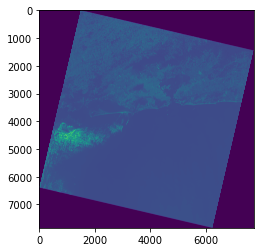

In [14]:
# imshow é o método do pyplot para visualização de imagens
#  Esse método imshow não aceita imagens multibandas. Para resolver isso é preciso manipular os índices, selecionando qual banda será visualizada
plt.imshow(stack[:,:,0])

 O método imshow já tem uma cor pré definida. Caso queira alterar a cor e preciso colocar o parametro "cmap" que tem a rampa de cores.  

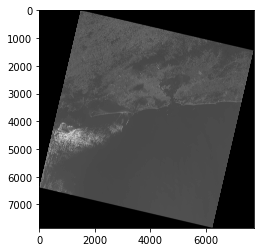

In [28]:
plt.imshow(stack[:,:,0], cmap = 'Greys_r')

 Para fazer uma composição colorida de varias bandas você pode usar um método de mesmo nome (imshow) porém de outra biblioteca, spectral. 

In [29]:
!pip install spectral 

In [26]:
from spectral import imshow 

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 28678.0]
    G: [0.0, 42776.0]
    B: [0.0, 65535.0]

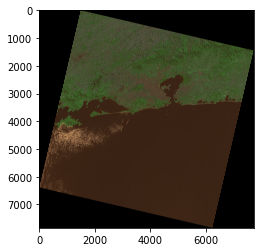

In [8]:
# note que não tem dlt pois como falei não é do pyplot, é da spectral.
imshow(stack)

Dessa maneira as bandas serão plotadas de forma aleatória. Se voce quiser plotar bandas específicas, é preciso colocar o paramentro bands que recebe uma tupla, selecionando as bandas para cada canal (R, G, B)

ImageView object:
  Display bands       :  (1, 0, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 42776.0]
    G: [0.0, 28678.0]
    B: [0.0, 65535.0]

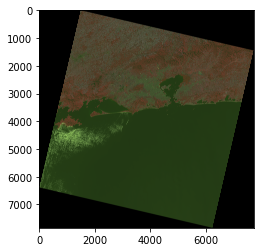

In [9]:
imshow(stack, bands= (1,0,2))



# **GDAL**

In [18]:
from osgeo import gdal 

In [21]:
img = gdal.Open('/content/B4_1.tif')

O gdal não le o arquivo como array, veja:




In [22]:
print(img)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f40ce04b4b0> >


Para o imshow rodar tem que estar na estrutura array. É preciso criar outra variavel que receba como array

In [23]:
img2 = img.ReadAsArray()

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [5749.0, 65535.0]
    G: [5749.0, 65535.0]
    B: [5749.0, 65535.0]

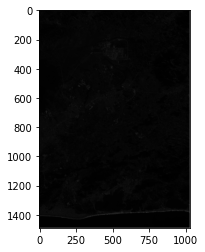

In [27]:
imshow(img2)

 Caso seja uma imagem com mulltibandas é preciso selecionar os indices. Fique atento que por default as bandas são o primeiro argumento. Para trocar é preceiso usar o .swapaxes. 

In [8]:
from osgeo import gdal
import numpy as np 

b4inicial = gdal.Open('/content/LO82170762021236CUB00_B4.TIF')
b5inicial = gdal.Open('/content/LO82170762021236CUB00_B5.TIF')
b6inicial = gdal.Open('/content/LO82170762021236CUB00_B6.TIF')

b4 = b4inicial.ReadAsArray()
b5 = b5inicial.ReadAsArray()
b6 = b6inicial.ReadAsArray()

stack = np.dstack([b4,b5,b6])

In [30]:
stack.shape 

(7841, 7731, 3)

ImageView object:
  Display bands       :  (0, 1, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 28678.0]
    G: [0.0, 42776.0]
    B: [0.0, 65535.0]

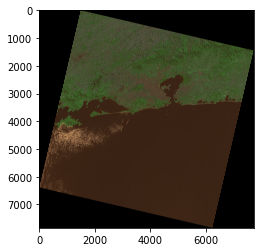

In [25]:
imshow(stack, (0,1,2))

##**RASTERIO**## 

In [21]:
!pip install rasterio 

In [9]:
import rasterio
from rasterio.plot import show
from osgeo import gdal
import numpy as np 

In [10]:
b4_1 = gdal.Open('/content/LO82170762021236CUB00_B4.TIF')

In [11]:
b4 = b4_1.ReadAsArray()

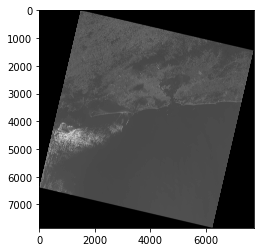

In [17]:
show(b4, cmap='Greys_r')

O diferencial do metodo show do rasterio.plot é que ele tem mais um plano de informação que mostra as coordenadas. 